### Import modules

In [1]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### load data 
- #### dataset (x: imdb article -> y: text type)
- #### word2idx dict (key: word; value: index)

### 사전에 있는 단어가 10000개라고 잡고 한 거라는 설정. 이 범위를 넘어가는 단어는 unknown으로 처리하면 됨. 
    처리할 단어를 미리 사전에 등록시켜 두어야함 
    단어를 처리하는 방식-> one hot coding
    리뷰니까 여러 단어를 한번에 처리하면 됨. 
    우리는 리뷰 하나 당 하나의 평가를 처리하고 싶으니까 리뷰의 여러단어를 합쳐야함. (우리는 평균을 해 줄 것임)
    word2idx -> 단어랑 인덱스랑 같이 있는거
    

In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
y_train[100]

0

### modifiy word2idx dict (to reflect x_train, x_text)
    v+3을 안해주면 결국 처음 인덱스랑 똑같으니까 의미가 없어짐. 
    밑에 내용들은 <pad>를 key로 만들어 주고 value 값을 0으로 하라는 것. 
    사전을 업데이트했다고 생각하면 됨. 

In [ ]:
word2idx.items() # word2idx안에 있는 걸 뿌려줌. 안에 item이 두개 씩이니까, key랑 value값 두가지가 받아짐. 

In [7]:
word2idx = {k:v+3 for k, v in word2idx.items()}
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

### create idx2word: inverse of word2idx
    value가 먼저 나오는 사전

In [8]:
idx2word = {v:k for k, v in word2idx.items()}

### padding x_train, x_test
    길면 자르고, 모자라면 <pad>로 채워줌. 
    padding='post'-> 뒷부분에 pad를 넣어라. 
     value=word2idx['<PAD>']-> pad value는 0이니까 0으로 채워라

In [9]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

### create model
    embedding 256의 벡터를 10000*256의 행렬로 바꾸어주는 과정
    1의 개수: 256
    0의 개수 9999*256
    평균 전 256*128
    평균 후 1*128

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [12]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 55s 3ms/sample - loss: 0.6559 - acc: 0.7090 - val_loss: 0.5882 - val_acc: 0.7847
Epoch 2/10
16750/16750 [==============================] - 51s 3ms/sample - loss: 0.5068 - acc: 0.8266 - val_loss: 0.4460 - val_acc: 0.8387
Epoch 3/10
16750/16750 [==============================] - 49s 3ms/sample - loss: 0.3878 - acc: 0.8685 - val_loss: 0.3694 - val_acc: 0.8616
Epoch 4/10
16750/16750 [==============================] - 51s 3ms/sample - loss: 0.3221 - acc: 0.8864 - val_loss: 0.3301 - val_acc: 0.8735
Epoch 5/10
16750/16750 [==============================] - 50s 3ms/sample - loss: 0.2812 - acc: 0.9014 - val_loss: 0.3071 - val_acc: 0.8801
Epoch 6/10
16750/16750 [==============================] - 49s 3ms/sample - loss: 0.2518 - acc: 0.9116 - val_loss: 0.2934 - val_acc: 0.8850
Epoch 7/10
16750/16750 [==============================] - 53s 3ms/sam

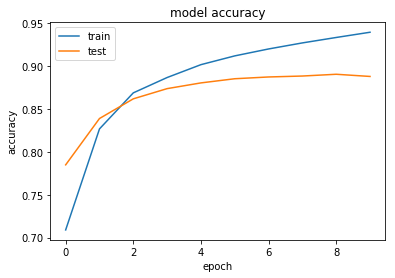

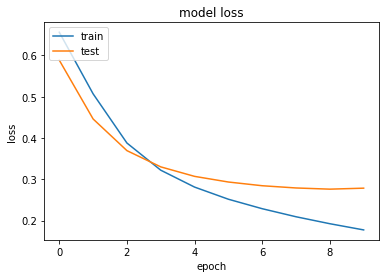

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [17]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 14s 543us/sample - loss: 0.2911 - acc: 0.8801


[0.29114954818725586, 0.88008]

### inference

In [20]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out)

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

In [15]:
x_test[100]

array([   1,    6, 1605, 7334,   33,    4,  863,    7,   14,   22,   62,
        306,    8, 7147,   43,  160,  995,    2,    2,    2, 8462, 3340,
          4,  552,  121,  383, 9538,  341,    5,    4,  156,   26,   32,
        616, 2118,   25,  165,  181,    8,  783,  190, 1545, 5779,   53,
         10,   10,  247,   74, 1152,   23, 3883, 2120,    5,  599,  151,
         50,    9,    6,  117,    7,  257,   57,  383,  190,    4,  509,
       2679,   23, 4498, 8153, 6249,    2, 1074, 6929,    6, 1334,    2,
       4157,  134, 1417,   26, 1037,    2,   34,    6,  177,    7, 7292,
       1451,  105,    5,    2,   15,   26,   53, 8955,   74, 3440,    2,
          7,  445,  449, 1243,  742, 4224,    9,  133,   99,    5,   54,
          9,   15,   24,    6,   52,  155,   10,   10,   48,   25,  423,
        355,  471,   95,  106,   14,    8,   67,  121,   76,    7, 9665,
          2,  385,   39,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   